## Setup

Imports and Function Definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_values(line):
    return np.fromstring(line.replace("[", "").replace("]", ""), sep=",")

## Define Metadata

Ranges and Example Names

In [3]:
sigma_range = np.arange(0.1, 1, 0.1)
tau_chi_range = np.arange(0.1, 1, 0.1)
example_names = ['Example f7a15a13-200a-45bc-8543-b099b6754fc8', 'Example b8184bc1-f5f3-446c-92c6-82e3685925d1', 'Example 7738d32f-f7d6-418e-ab48-364165d71711', 'Example 2ea1b0f3-0df3-4292-aa99-03d9667c19d5', 'Example 6f24e811-f30e-4981-85d9-26c868e4b056']

## Import Gurobi Solutions

In [4]:
def read_gurobi_data(file):
    _ = file.readline() # Example names
    gurobi_utilities = get_values(file.readline())
    gurobi_times = get_values(file.readline())
    _ = file.readline() # Violated bound constraints
    _ = file.readline() # Violated temporal constraints
    return gurobi_utilities, gurobi_times

file = open("hyperparameter_optimization/gurobi", "r")
gurobi_utilities, gurobi_times = read_gurobi_data(file)
file.close()
print(gurobi_utilities.shape, gurobi_times.shape)

(5,) (5,)


## Import ADMM Solutions

In [5]:
def read_admm_data(folder):
    admm_utilities = np.load(f"{folder}/admm_utilities.npy")
    admm_times = np.load(f"{folder}/admm_times.npy")
    return admm_utilities, admm_times

folder = "hyperparameter_optimization"
admm_utilities, admm_times = read_admm_data(folder)
print(admm_utilities.shape, admm_times.shape)
# print(admm_utilities)
# print(admm_times)

(9, 9, 5) (9, 9, 5)


## Calculate Statistics

Averaged (over the 5 examples) percentage of optimal (gurobi) welfare

In [6]:
average_relative_admm_utilities = np.zeros((len(sigma_range), len(tau_chi_range)))
for sigma in range(9):
    for tau_chi in range(9):
        average_relative_admm_utilities[sigma][tau_chi] = np.mean(admm_utilities[sigma][tau_chi] / gurobi_utilities)
print(average_relative_admm_utilities.shape)

(9, 9)


## Visualize Statistics

[[6 8]]
[[0.85 0.75 0.74 0.71 0.71 0.71 0.7  0.68 0.7 ]
 [0.81 0.77 0.72 0.72 0.75 0.71 0.71 0.67 0.68]
 [0.82 0.78 0.81 0.73 0.77 0.72 0.69 0.69 0.67]
 [0.82 0.77 0.72 0.82 0.78 0.7  0.68 0.67 0.69]
 [0.8  0.87 0.72 0.79 0.8  0.68 0.69 0.67 0.67]
 [1.18 0.86 0.82 0.81 1.21 0.67 0.71 1.04 0.68]
 [0.9  1.25 1.22 0.85 0.71 1.04 0.69 1.09 0.67]
 [1.25 0.9  1.21 0.82 0.71 1.08 1.07 0.68 1.04]
 [1.2  0.91 1.27 0.73 0.86 0.92 0.68 0.69 1.12]]


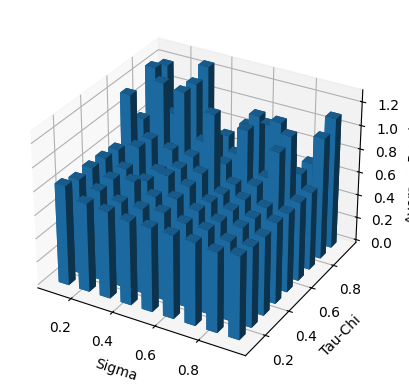

In [7]:
ax = plt.figure().add_subplot(projection='3d')

_x = sigma_range
_y = tau_chi_range
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
average_runtimes = np.mean(admm_times, axis=2)
print(np.argwhere(average_runtimes == np.min(average_runtimes)))
print(np.round(average_runtimes, 2))
ax.bar3d(x, y, np.zeros(81), 0.05, 0.05, average_runtimes.flatten())
plt.xlabel("Sigma")
plt.ylabel("Tau-Chi")
ax.set_zlabel("Average Runtimes")
ax.view_init(30, -60)
plt.show()

[[0.98 0.97 0.97 0.98 0.97 0.98 0.98 0.98 0.98]
 [0.98 0.98 0.98 0.97 0.98 0.98 0.98 0.98 0.98]
 [0.97 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
 [0.97 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
 [0.97 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
 [0.97 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
 [0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
 [0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
 [0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]]


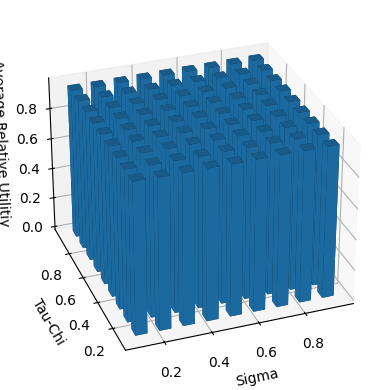

In [8]:
ax = plt.figure().add_subplot(projection='3d')

_x = sigma_range
_y = tau_chi_range
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
print(np.round(average_relative_admm_utilities, 2))
ax.bar3d(x, y, np.zeros(81), 0.05, 0.05, average_relative_admm_utilities.flatten())
plt.xlabel("Sigma")
plt.ylabel("Tau-Chi")
ax.set_zlabel("Average Relative Utilitiy")
ax.view_init(30, -110)
plt.show()